## STANDARD ANLYSIS OF CORRELATIONS BETWEEN A PAIR OF ASSETS
The cell below imports the standard stuff and creates a button to bring up the search_symbol_gui. 
- With this you can search for asset data and create watchlists. 
- You can then download the historical price data for the assets in that watchlist. 
- Then choose any selected pair of the assets in the watchlist and perform correlation analysis on the using my PairStats class.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.format'] = 'svg'
plt.rcParams['animation.frame_format'] = 'svg'
plt.rcParams["figure.figsize"] = (10, 5.5)

# This gets the path where the MacroBackend is stored, so it can be imported.
# This is done with the in develpment version of the repo as an alternative to having the repo available  on pip as a finished package.

import os
wd = %pwd   #The current working directory is the one where this notebook file is stored
parent = os.path.dirname(wd); grampa = os.path.dirname(parent)
fdel = os.path.sep   #The file path delimiter is OS dependent
import sys
sys.path.append(grampa)  #This adds the grandparent directory which contains the macrobackend to the system path

#Use inline magic command to display plots in the notebook
%matplotlib inline 
bmsylePath = grampa + fdel + "MacroBackend" + fdel + "bm_inline.mplstyle"
plt.style.use(bmsylePath)  #This applies the bm_inline style to all matplotlib plots

import MacroBackend #This package is the main bunch of modules that comprise Bootleg_Macro.

import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = MacroBackend.Utilities.api_keys()

######Code to run the symbol search GUI below
%gui qt
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = MacroBackend.search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols, load and create watchlists")
button2 = widgets.Button(description="Load watchlist")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
# Step 5: Use HBox to position buttons next to each other
button.layout.width = '350px'
display(button)

######Code to run the symbol search GUI below

def load_watchlist(b) -> MacroBackend.search_symbol_gui.Watchlist:
    global watchlist  # Declare the use of the global variable
    print("Choose your cunt you fuckstick.")
    watch = MacroBackend.search_symbol_gui.Watchlist()
    watch.load_watchlist()
    if watch["watchlist"].empty:
        print("No watchlist loaded.")
    else:
        print("Successfully loaded watchlist.")
        watchlist = watch

button2 = widgets.Button(description="Load watchlist")
button2.on_click(load_watchlist)
display(button2)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.


Button(description='Search for symbols, load and create watchlists', layout=Layout(width='350px'), style=Butto…

Button(description='Load watchlist', style=ButtonStyle())

Choose your cunt you fuckstick.
Loading watchlist from filepath:  
Checking for duplicates in watchlist... Original index/columns watchlist/metadata:  Index(['^SPX', '^VIX', '^NDX', '^DJI', 'price_usd_close', '^RUT', '000300.SS',
       'URTH', 'INDA', 'NIKKEI225', 'DDEM01USA156NWDB', 'DDOM01USA644NWDB',
       'M1346BUSM156NNBR', 'M11007USM322NNBR', 'DDDM02USA156NWDB'],
      dtype='object') Index(['^SPX', '^VIX', '^NDX', '^DJI', 'price_usd_close', '^RUT', '000300.SS',
       'URTH', 'INDA', 'NIKKEI225', 'DDEM01USA156NWDB', 'DDOM01USA644NWDB',
       'M1346BUSM156NNBR', 'M11007USM322NNBR', 'DDDM02USA156NWDB'],
      dtype='object')
Duplicate indexes found in watchlist:  []
Duplicate columns found in metadata:  []
Successfully loaded watchlist.


## Get the data series for the watchlist from the data sources listed in the watchlist dataframe

In [83]:
#watchlist.get_watchlist_data()  ## Use .get_watchlist_data() if this is a new watchlist or different machine and his method has not yet been called for this watchlist, thus no .h5s database file exists on disk for it.
watchlist.load_watchlist_data()   ## Use .load_watchlist_data() if you already have the data saved in a .h5s database file.
data = watchlist["watchlist_datasets"] ## Put all of the data into a single dict 'data' for quicker reference
data    # print the dict full of datafarmes/series of data.

Database filepath:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/EquityIndexes/EquityIndexes.h5s
Databse keys:  ['/000300.SS', '/DDDM02USA156NWDB', '/DDEM01USA156NWDB', '/DDOM01USA644NWDB', '/INDA', '/M11007USM322NNBR', '/M1346BUSM156NNBR', '/NIKKEI225', '/URTH', '/^DJI', '/^NDX', '/^RUT', '/^SPX', '/^VIX', '/price_usd_close']
Loaded database from .h5s file, keys:  dict_keys(['000300.SS', 'DDDM02USA156NWDB', 'DDEM01USA156NWDB', 'DDOM01USA644NWDB', 'INDA', 'M11007USM322NNBR', 'M1346BUSM156NNBR', 'NIKKEI225', 'URTH', '^DJI', '^NDX', '^RUT', '^SPX', '^VIX', 'price_usd_close'])


{'000300.SS': 2021-03-11    5128.220215
 2021-03-12    5146.379883
 2021-03-15    5035.540039
 2021-03-16    5079.359863
 2021-03-17    5100.859863
                  ...     
 2024-09-05    3257.760010
 2024-09-06    3231.350098
 2024-09-09    3192.949951
 2024-09-10    3195.760010
 2024-09-11    3185.337891
 Name: 000300.SS, Length: 854, dtype: float64,
 'DDDM02USA156NWDB': date
 1975-01-01      8.14770
 1976-01-01      9.25162
 1977-01-01      7.96772
 1978-01-01      9.60385
 1979-01-01     10.34700
 1980-01-01     14.34270
 1981-01-01     12.96400
 1982-01-01     15.19660
 1983-01-01     21.93490
 1984-01-01     27.45240
 1985-01-01     33.85090
 1986-01-01     47.63960
 1987-01-01     59.25510
 1988-01-01     37.52740
 1989-01-01     41.50560
 1990-01-01     34.07760
 1991-01-01     34.74830
 1992-01-01     38.80860
 1993-01-01     50.07480
 1994-01-01     50.07030
 1995-01-01     67.78540
 1996-01-01     86.28010
 1997-01-01    108.02100
 1998-01-01    135.77700
 1999-01-01    19

# View Watchlist

In [84]:
#watchlist.save_watchlist()  # If you have used the get_data_method() be usre to run this to save the new data to .h5s database.
watchlist["watchlist"]   # This is the main watchlist dataframe, view watchlist.

,id,title,source
^SPX,^SPX,S&P 500 INDEX,yfinance
^VIX,^VIX,CBOE Volatility Index,yfinance
^NDX,^NDX,NASDAQ 100,yfinance
^DJI,^DJI,Dow Jones Industrial Average,yfinance
price_usd_close,price_usd_close,BTC,glassnode
^RUT,^RUT,Russell 2000,yfinance
000300.SS,000300.SS,CSI 300 Index,yfinance
URTH,URTH,iShares MSCI World ETF,yfinance
INDA,INDA,iShares MSCI India ETF,yfinance
NIKKEI225,NIKKEI225,"Nikkei Stock Average, Nikkei 225",fred


In [60]:
ass1id = "^SPX"   # Assign the first asset of the pair that you wish to perform correlation analysis upon. "id" is the symbol of the asset.
ass2id = '^VIX'     # Choose the the second asset of the pair that you wish to perform correlation analysis upon.
ass1 = data[ass1id]  # These are the data series for each asset assigned to shorrt form reference.
ass2 = data[ass2id]

##  CREATE THE PAIR_STATS OBJECT. THIS DOES MOST OF THE CORRELATION ANALYSIS WORK..
- Set the list of windows for your rolling PCC calculations. The windows are number of periods of asset at the frequency that the asset data are.
- Provide title names you would like to use (no spaces in names, best to use short names)
- You can downsample the data to a lower frequency e.g "W" (weekly) or "ME" (month-end). Do this is you have e.g crypto data (daily frequency) and equity data
of business day frequency. Downsample them both to weekly for best results. ALternatively ffill the equity data prior to insertion into pair_stats object.
- Provide the watchlist metadata too so that it can be used for labels etc.

In [63]:
pair1 = MacroBackend.Utilities.Pair_stats(ass1, ass2, windows=[104, 208, 416], ser1_title="SP500", ser2_title="VIX", watchlist_meta=watchlist['metadata'], downsample_to="W")

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


Series names - series1: SP500 series2: VIX
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  SP500  frequency:  None
Couldn't discern frequency in the regular manner, trying manual process....
Looks like average index timedelta is:  D , resampling series to that frequency.
Frequency determination function for series:  VIX  frequency:  None
Couldn't discern frequency in the regular manner, trying manual process....
Looks like average index timedelta is:  D , resampling series to that frequency.
Daily Daily
Frequency determination function for series:  SP500  frequency:  W-SUN
Calculating returns for series:  SP500 VIX
Windows:  [104, 208, 416]
Whole time correlation, SP500 vs VIX : -0.06318461729752085
Whole time correlation between log returns, SP500 vs VIX: -0.6983578310326456
Whole time correlation between percentage returns,SP500 vs VIX: -0.6887210888472706
Whole time qd correlation betwe

### Set your chosen colors for your two series and plot the series on a two-axis chart.

Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.
Left ticks:  ([300.02999877929676, 415.72368122278164, 576.0296631422932, 798.1507616882919, 1105.92332156727, 1532.3751500271537, 2123.2698096039853, 2942.017615135466, 4076.4803458406077, 5648.399902343751], ['300.0', '415.7', '576.0', '798.2', '1105.9', '1532.4', '2123.3', '2942.0', '4076.5', '5648.4'])
Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.


/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


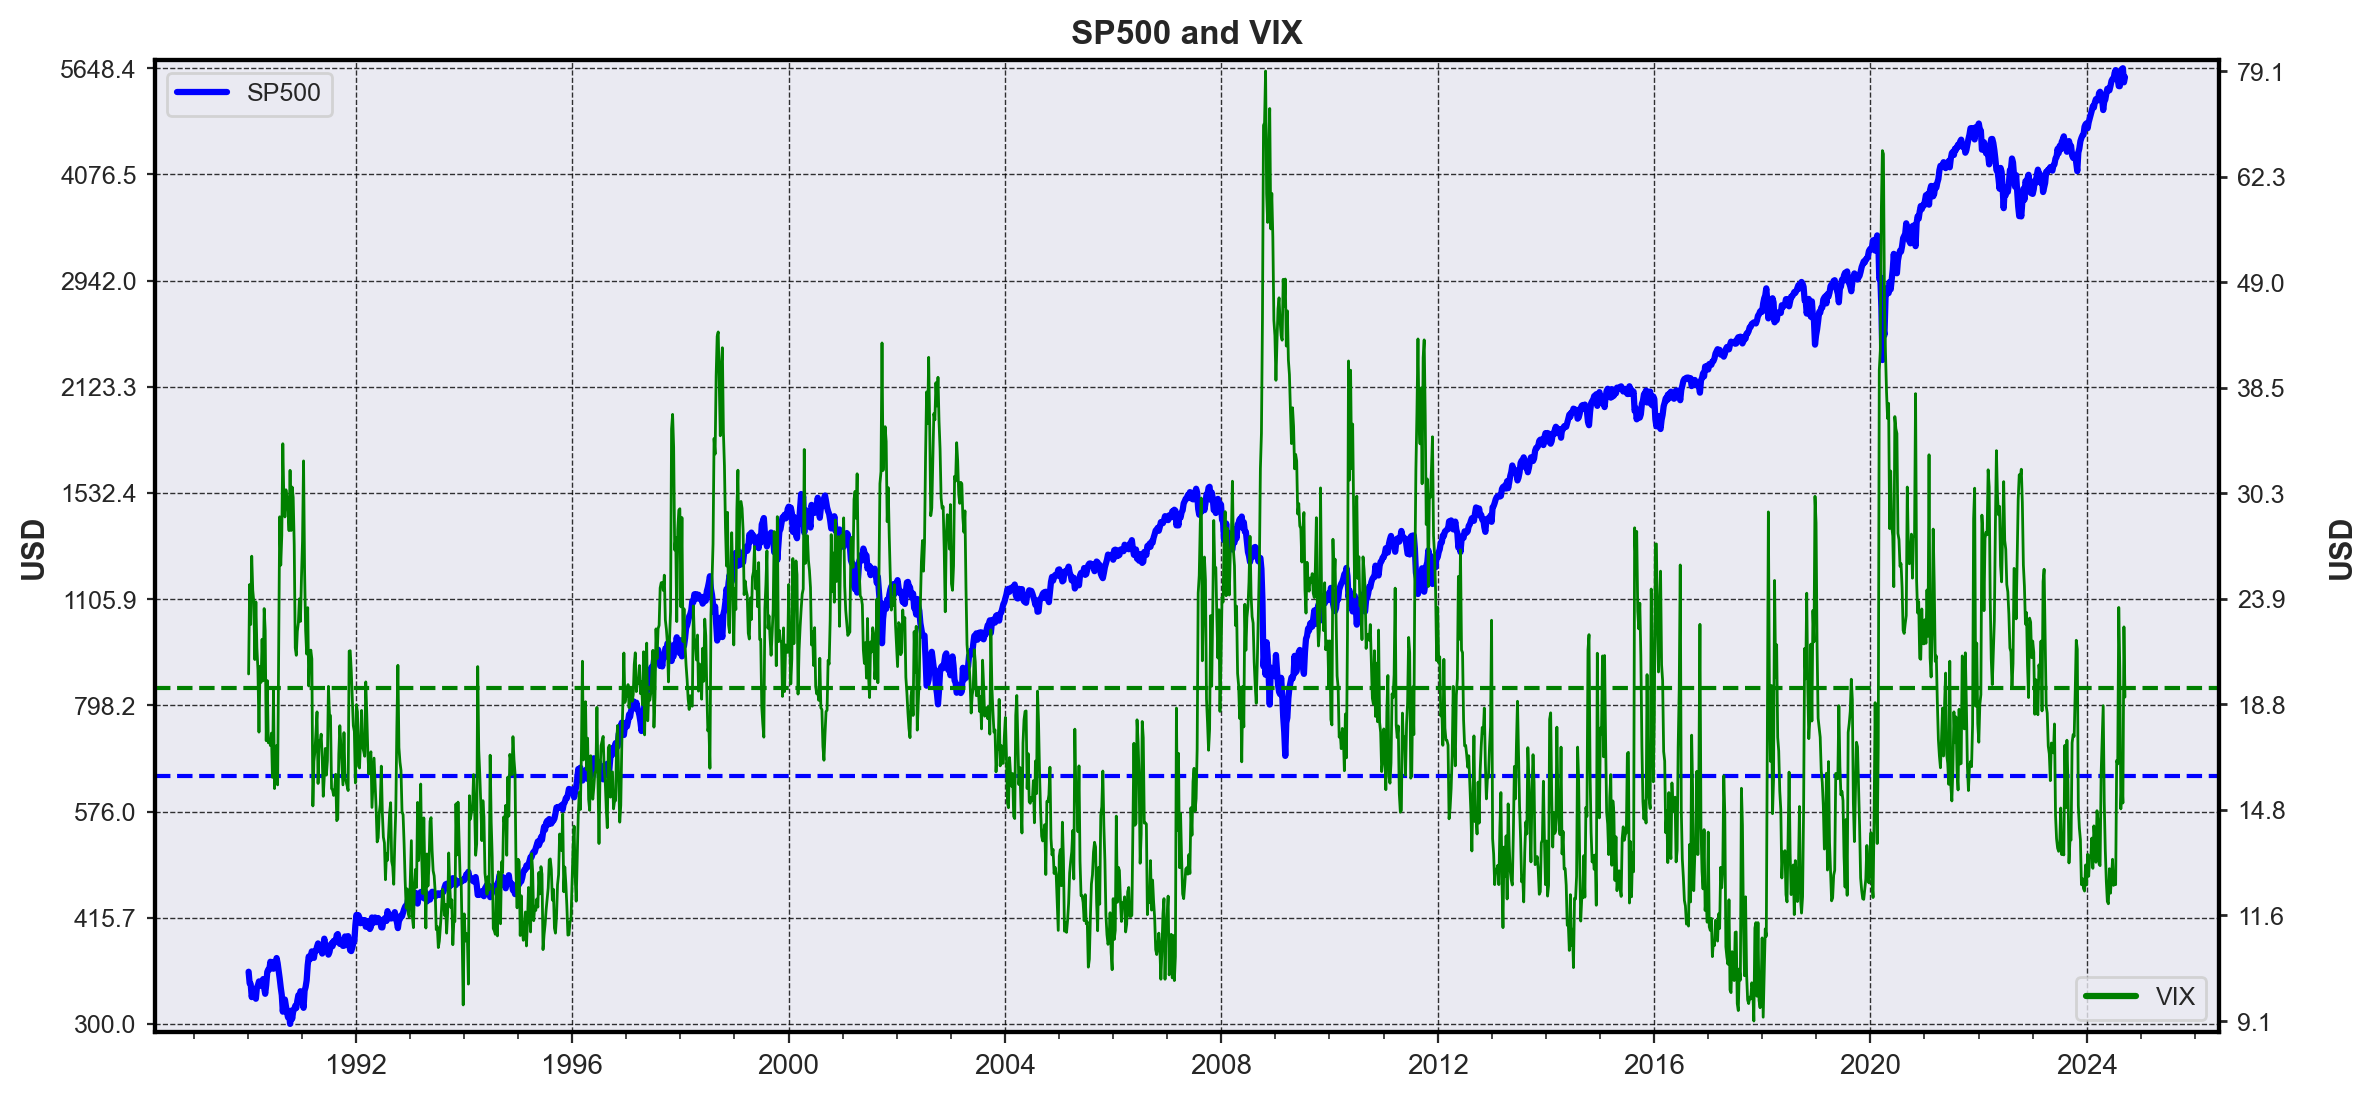

In [86]:
%matplotlib inline
c1 = "blue"; c2 = "green"  # c1 and c2 are the colors to use for series 1 and 2.
fig, ax = pair1.plot_series(color1=c1, color2=c2)   # this is my plot_series method.
ax.axhline(ass1.mean(), lw = 1.5, ls = "--", c = c1)  # Add horizontal lien for the mean. Comment out to remove the mean line.
axb = fig.axes[1]; axb.grid(False)
axb.axhline(ass2.mean(), lw = 1.5, ls = "--", c = c2)
axb.get_lines()[0].set_linewidth(1)
ax.minorticks_on()

### Optional deviation from the mean figure.
- Uses a plot template from my Charting module.
- SHows the deviation from the mean for each asset.

(<Figure size 2800x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Deviation from mean'}, ylabel='USD'>,
        <Axes: ylabel='USD'>], dtype=object))

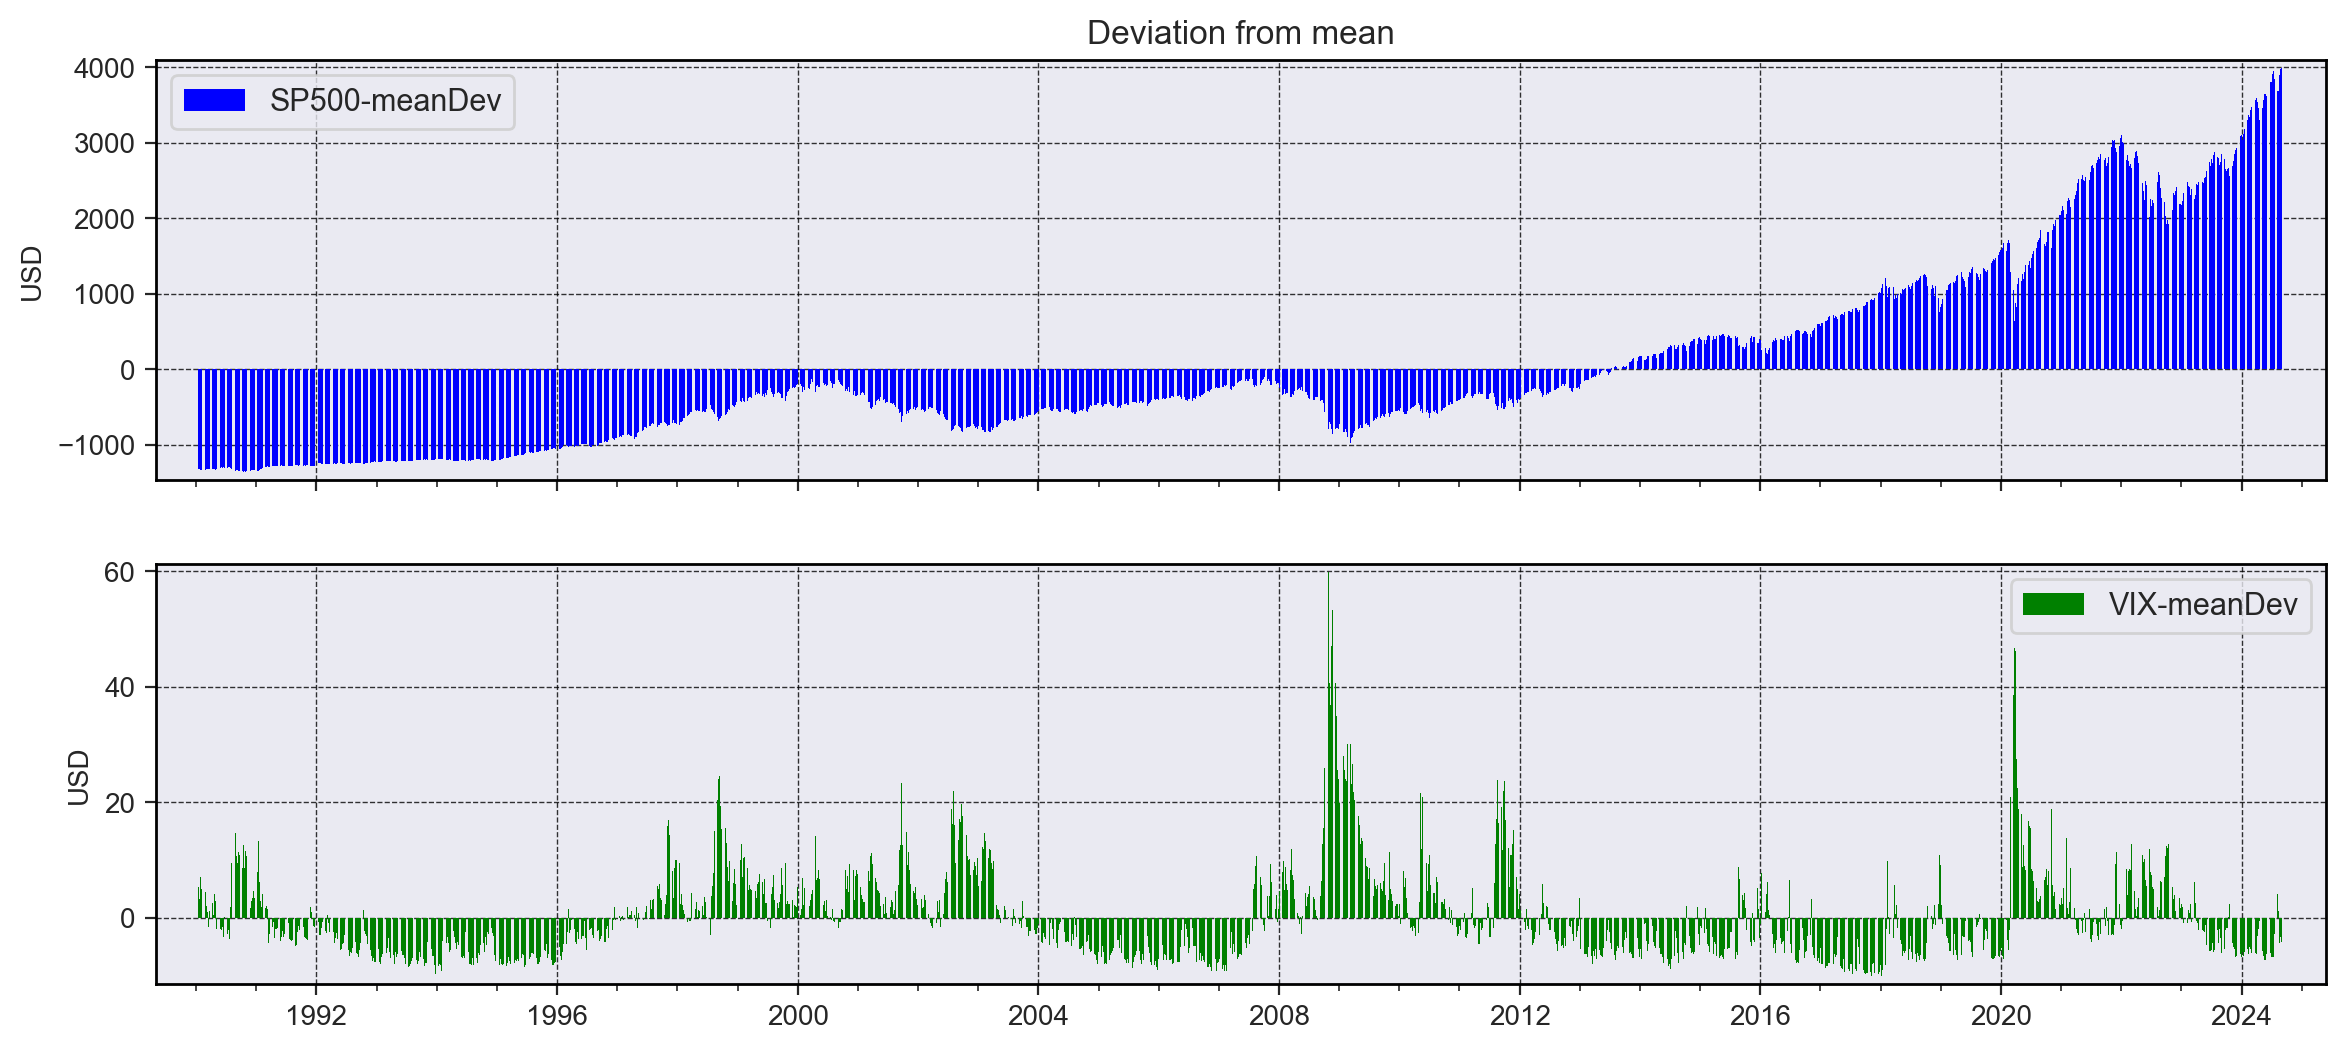

In [87]:
pair1.data[pair1.ser1_title+"-meanDev"] = pair1.data[pair1.ser1_title] - pair1.data[pair1.ser1_title].mean()
pair1.data[pair1.ser2_title+"-meanDev"] = pair1.data[pair1.ser2_title] - pair1.data[pair1.ser2_title].mean()
MacroBackend.Charting.gen_subplots_bar(pair1.data[pair1.ser1_title+"-meanDev"], pair1.data[pair1.ser2_title+"-meanDev"], color1=c1, color2=c2, title = "Deviation from mean")

## Plot Log Returns

Plot width:  2170.0 bar width:  5.203836930455635


(<Figure size 2800x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Log Returns: SP500 vs VIX'}, ylabel='Log Returns'>,
        <Axes: ylabel='Log Returns'>], dtype=object))

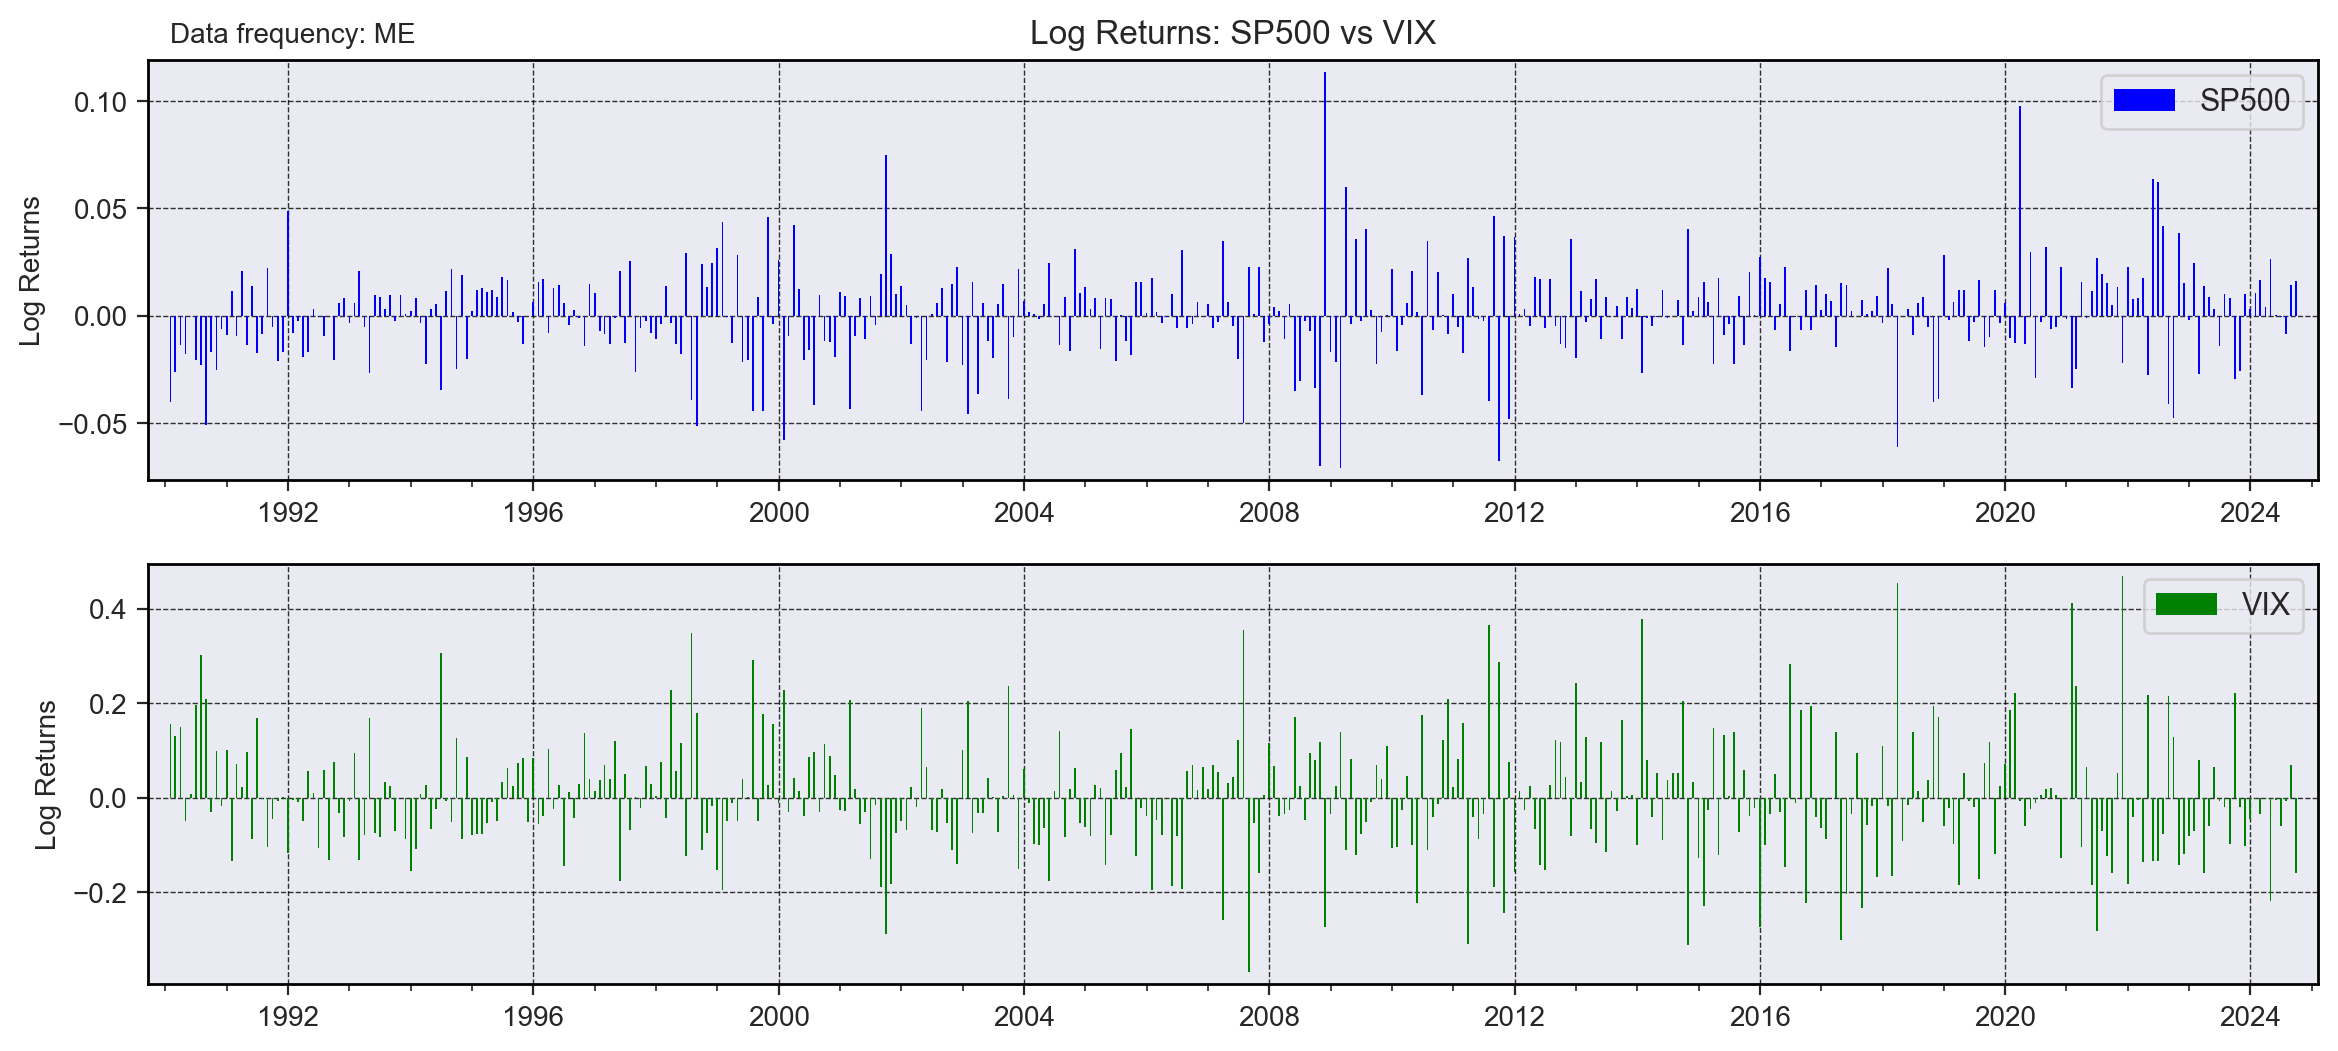

In [67]:
pair1.plot_log_returns_alt(color1=c1, color2=c2, downsample_to="ME")  # You can downsample further, just for this figure, won't affect the self.data DataFrame.

### My modfied scatter matrix plot with the kde peak line

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


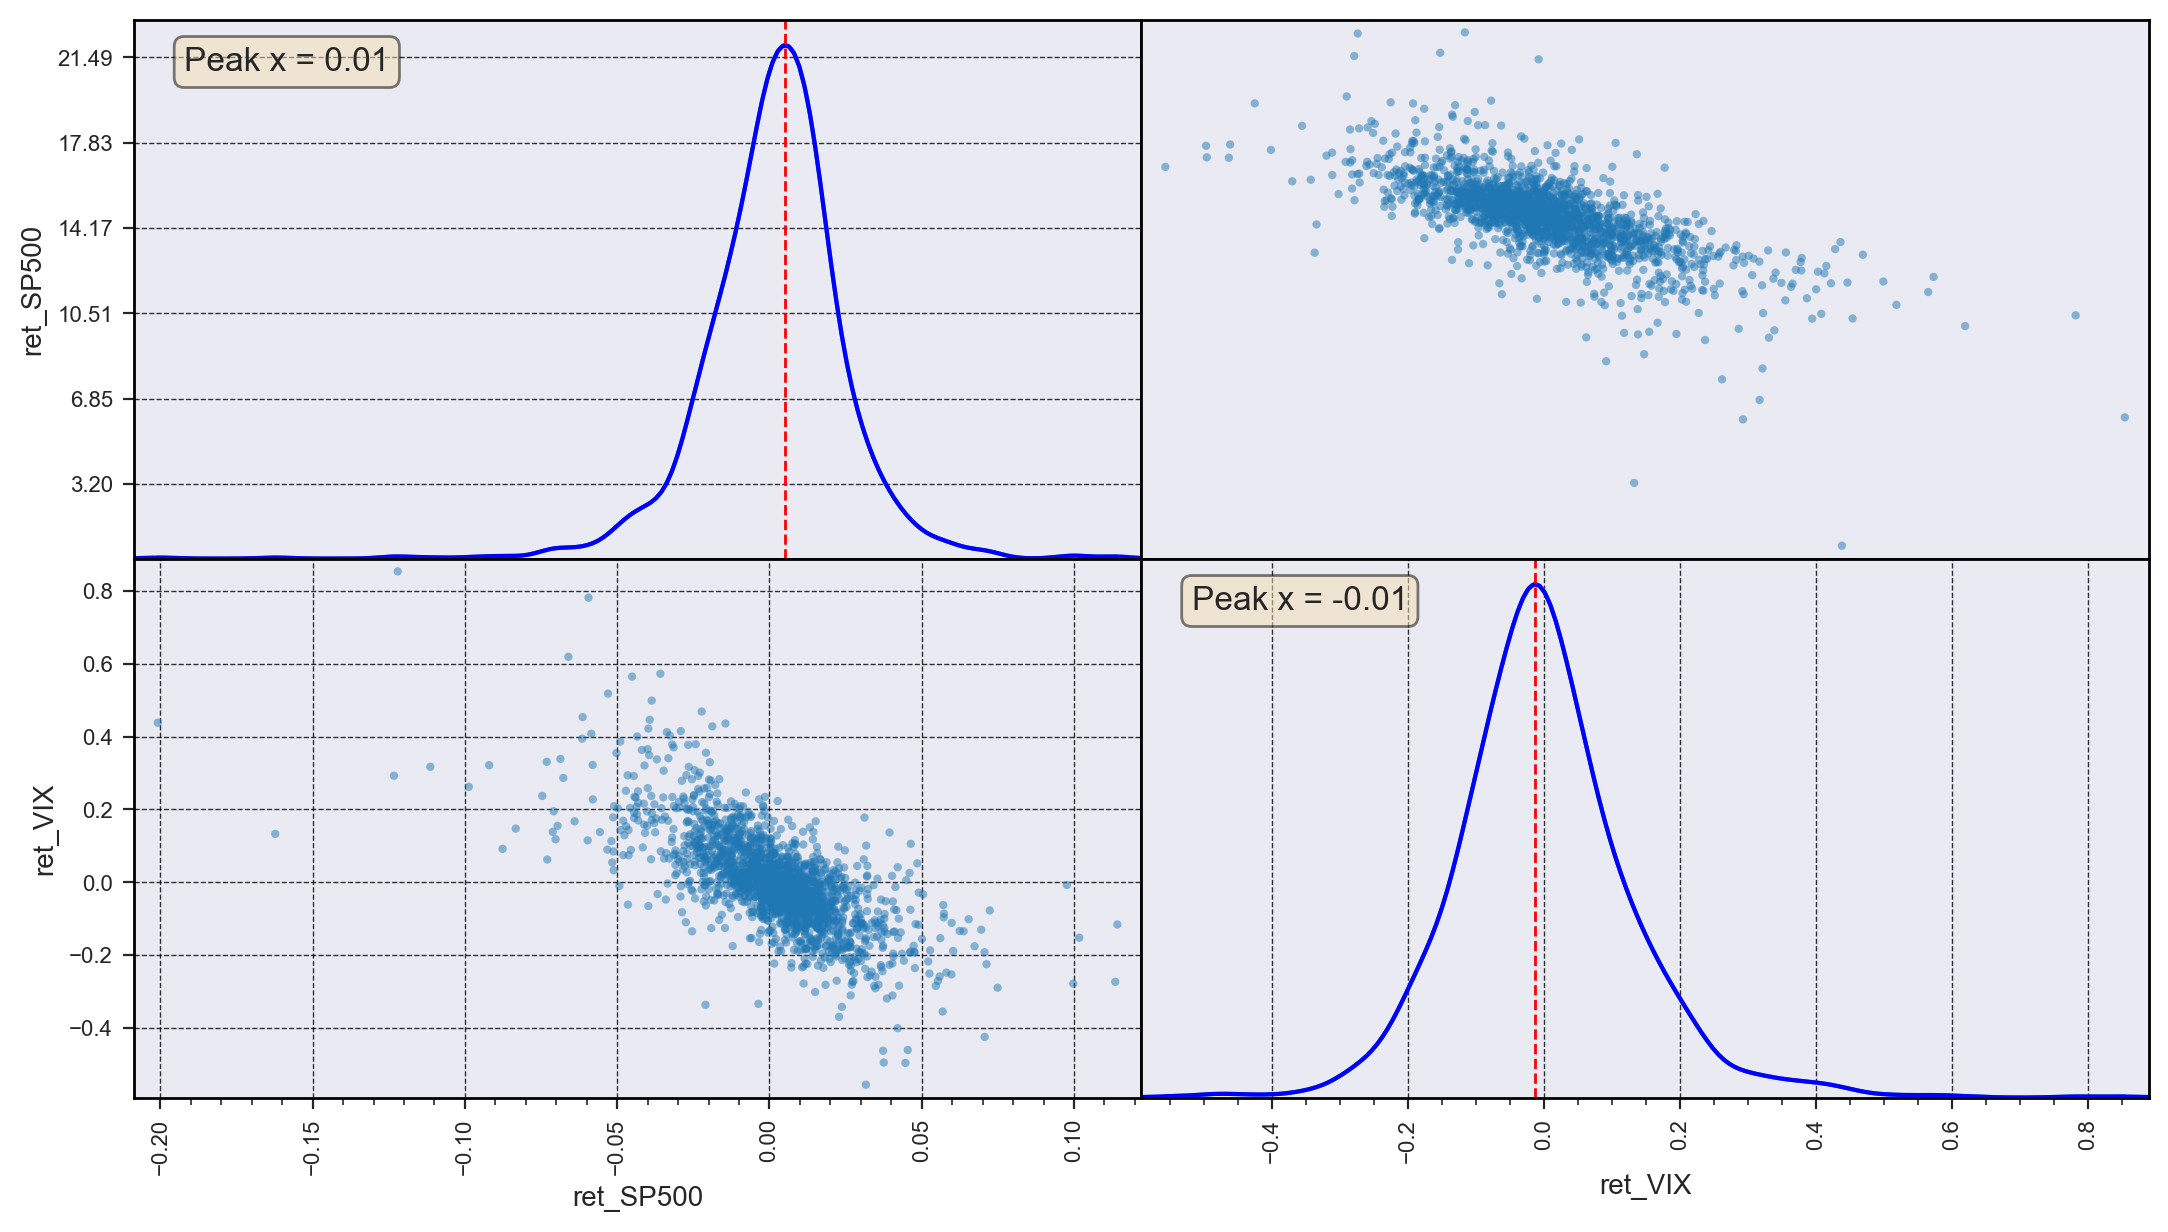

In [72]:
scatMat = pair1.bm_scatterMatrix()

### Linear regression with trendline shown and $R^2$ value printed.

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


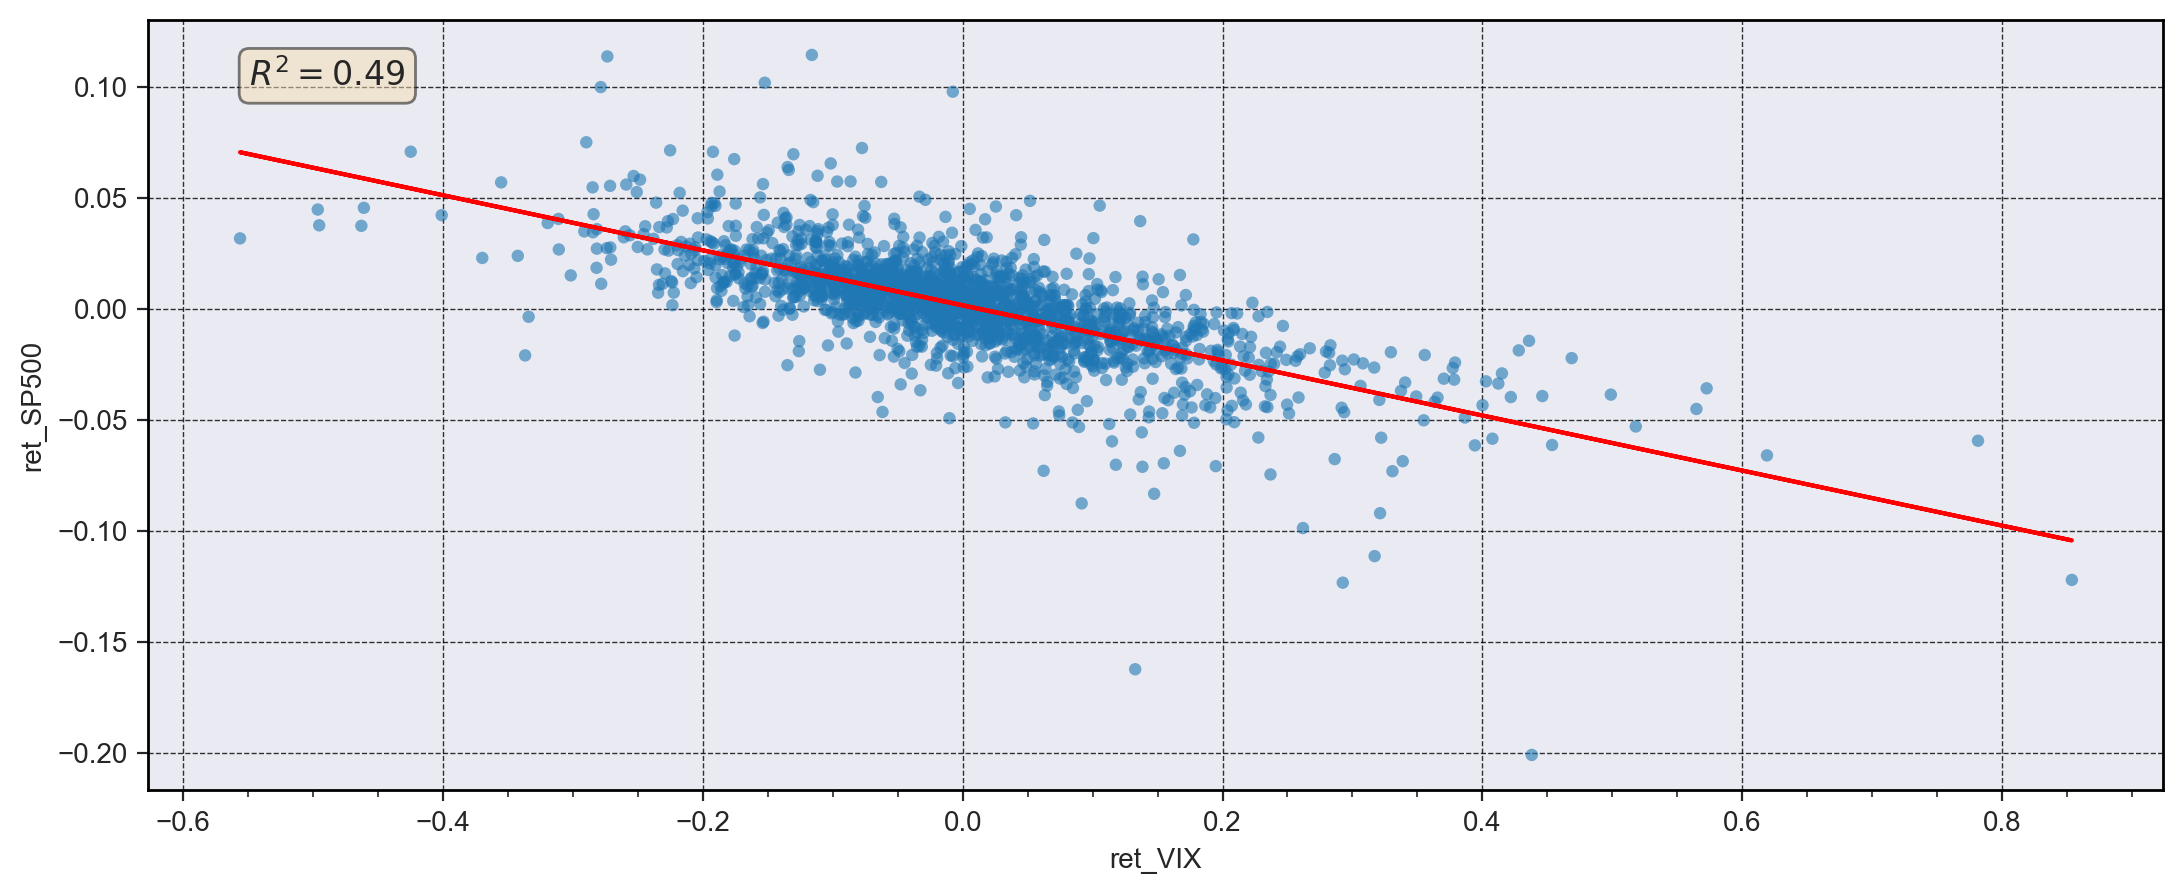

In [74]:
pair1.plot_lin_reg()

## Plot the rolling Pearson Corrlelation traces.
- You have the option to plot 1 - 4 subplots, using different means to calculate the correlation. 
- plot_wrong_way: bool = True - plot the correlation traces calculated using the actual series values (this is wrong).
- percentage_ret_corr: bool = False, plot the rolling PCC calculated using percentage returns rather than log returns.
- qd_corr: bool = False, plot the PCC traces done using a modified PCC formula by QuantDare.

Frequency of the pair:  Weekly


-0.06318461729752085

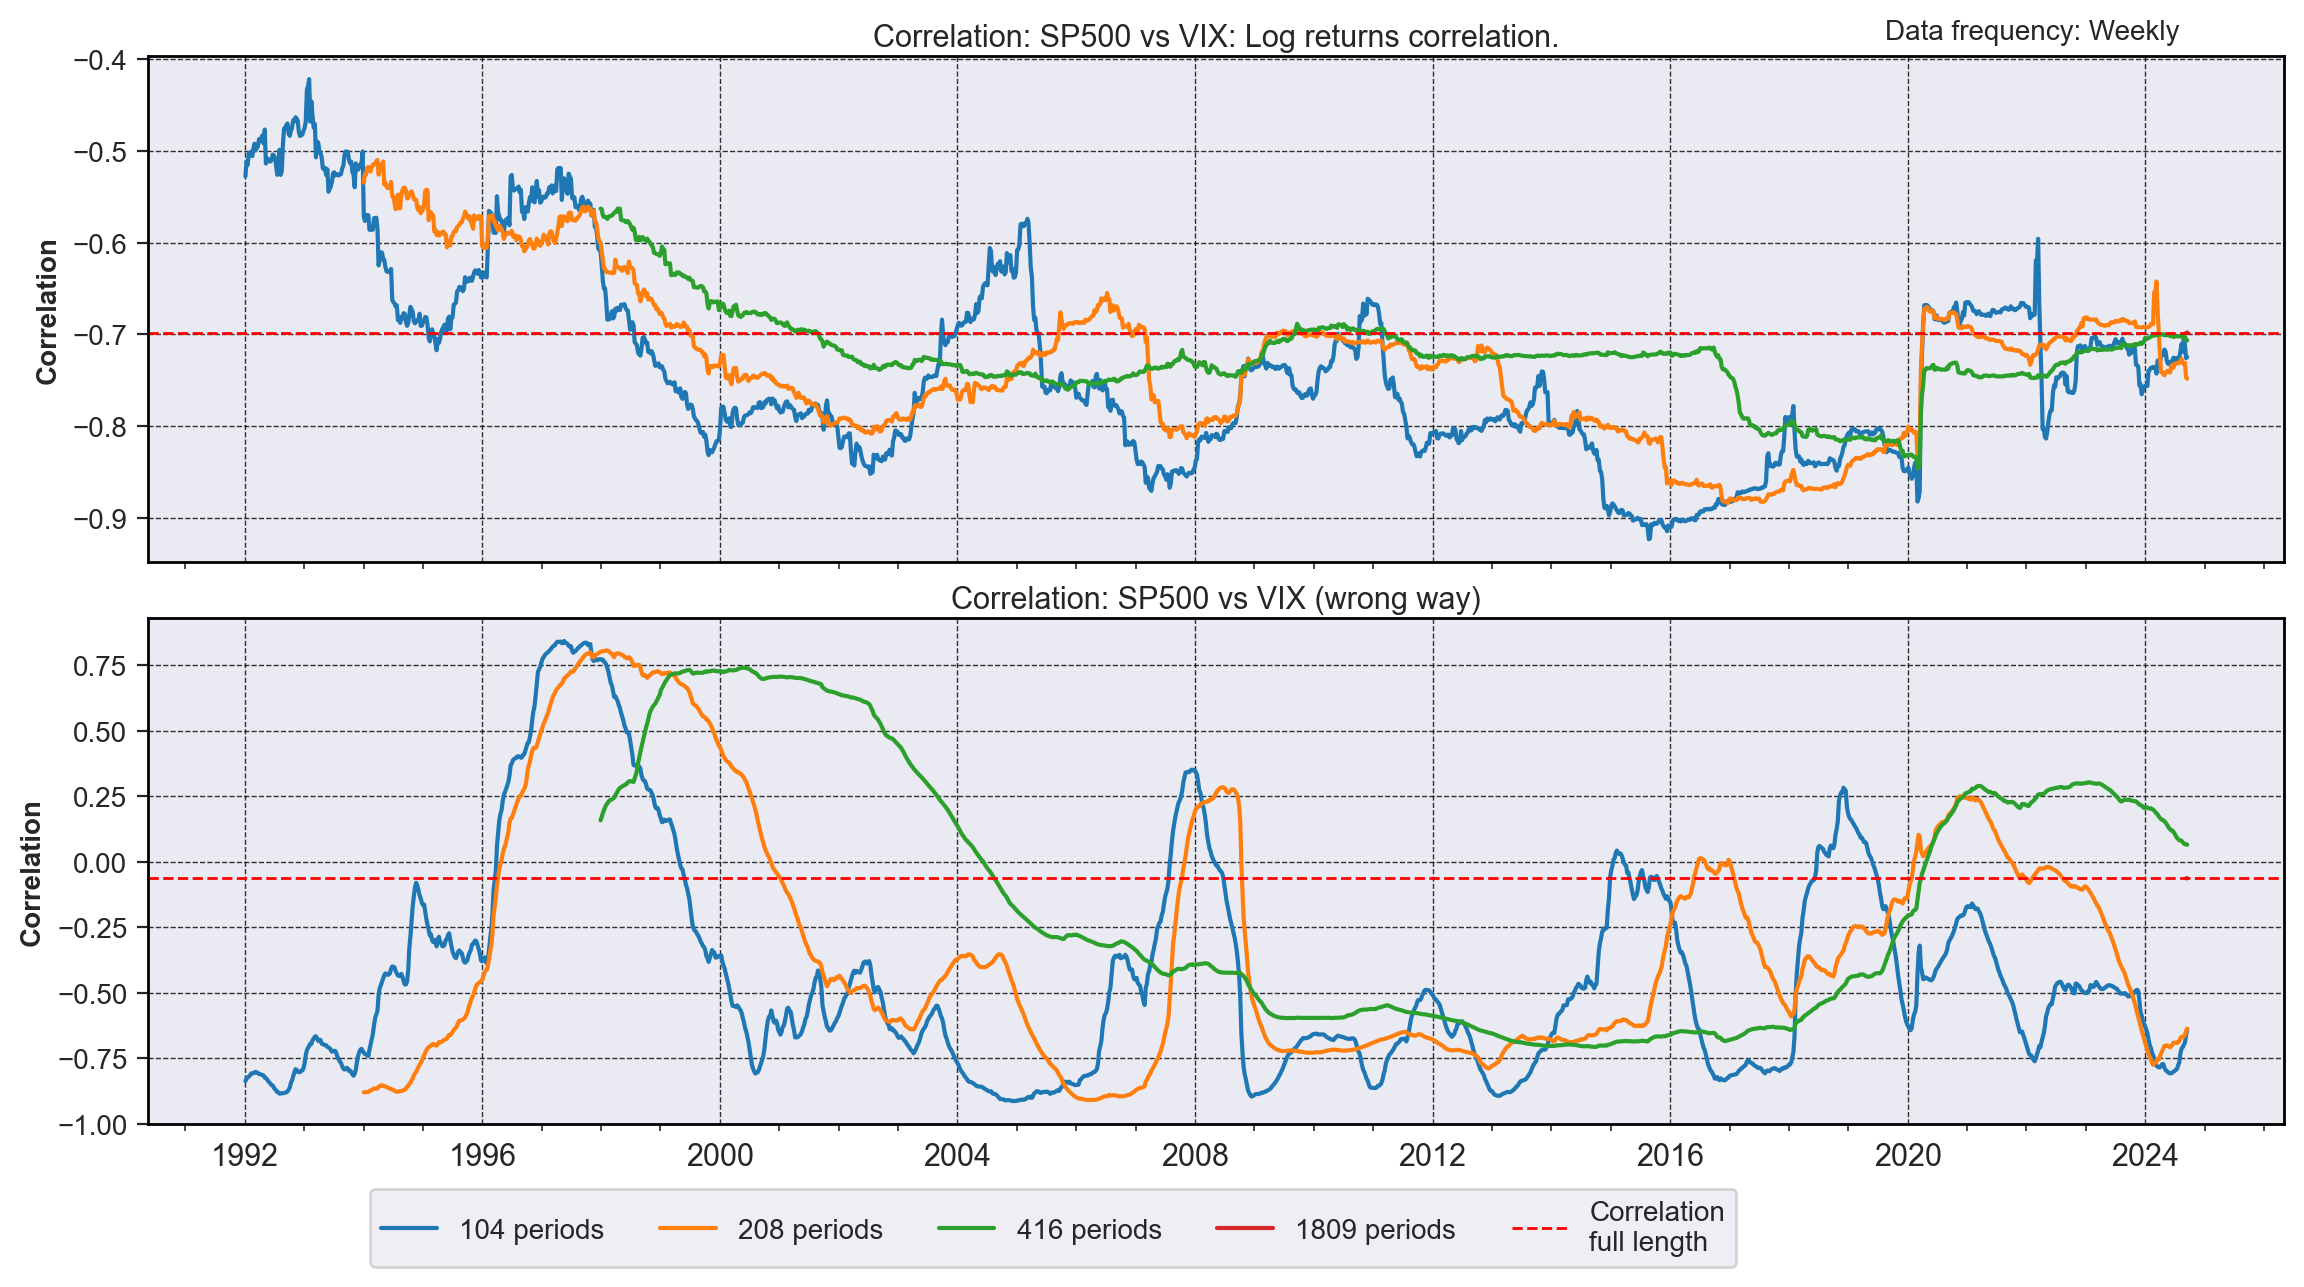

In [93]:
pair1.plot_corrs()
pair1.data["SP500"].corr(pair1.data["VIX"])

### Export your plots..

In [75]:
pair1.export_plots(savePath = "/Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/Correlation/assets", dialog="Qt", format = "svg")

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:1415: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.returns_plot.savefig(savePath + fdel + savename + '_ret.' + format, **save_options)


Saved figure 1 to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/Correlation/assets/SP500-VIX_series.svg
Saved returns_plot to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/Correlation/assets/SP500-VIX_ret.svg
Saved linear regression scatter plot to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/Correlation/assets/SP500-VIX_reg.svg
Saved correlation plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/Correlation/assets/SP500-VIX_corr.svg
Saved correlation plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/Correlation/assets/SP500-VIX_scatMat.svg
